# Train Custom Model Using Scikit Learn - Deadlift
## 1. Read in Collected Data and Process

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

In [2]:
df = pd.read_csv('deadlift_coords_merged.csv')

In [3]:
df.head(3)

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,d_correct,0.592055,0.387002,0.761125,0.976802,0.585143,0.381295,0.735319,0.980862,0.582941,...,0.491055,0.909689,0.588401,0.644509,0.169380,0.901291,0.728158,0.618136,0.480577,0.840292
1,d_correct,0.587373,0.376647,0.683136,0.983089,0.581771,0.369854,0.658460,0.985313,0.579841,...,0.409666,0.857568,0.582093,0.645119,0.139664,0.876760,0.694696,0.614433,0.398222,0.798012
2,d_correct,0.603379,0.289000,0.876913,0.977582,0.599490,0.280128,0.851040,0.982493,0.597362,...,0.369821,0.913276,0.565828,0.635022,0.151700,0.870137,0.743687,0.628615,0.331195,0.832618


In [4]:
print(df['class'].unique())

['d_correct' 'd_spine_neutral' 'd_arms_spread' 'd_arms_narrow']


In [5]:
df[df['class'] == 'd_correct']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,d_correct,0.592055,0.387002,0.761125,0.976802,0.585143,0.381295,0.735319,0.980862,0.582941,...,0.491055,0.909689,0.588401,0.644509,0.169380,0.901291,0.728158,0.618136,0.480577,0.840292
1,d_correct,0.587373,0.376647,0.683136,0.983089,0.581771,0.369854,0.658460,0.985313,0.579841,...,0.409666,0.857568,0.582093,0.645119,0.139664,0.876760,0.694696,0.614433,0.398222,0.798012
2,d_correct,0.603379,0.289000,0.876913,0.977582,0.599490,0.280128,0.851040,0.982493,0.597362,...,0.369821,0.913276,0.565828,0.635022,0.151700,0.870137,0.743687,0.628615,0.331195,0.832618
3,d_correct,0.704687,0.148774,0.440767,0.995209,0.700908,0.139350,0.365987,0.995613,0.695389,...,0.370875,0.964271,0.582262,0.644630,0.042322,0.923103,0.750335,0.640705,0.323895,0.838903
4,d_correct,0.716225,0.146869,0.293682,0.998649,0.713821,0.136261,0.216470,0.998652,0.709841,...,0.414867,0.955359,0.579698,0.642973,0.006126,0.938232,0.745315,0.636252,0.365578,0.844092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,d_correct,0.503398,0.435843,-1.035284,0.999994,0.520933,0.420880,-1.039586,0.999987,0.532123,...,-0.197855,0.815569,0.621861,0.801608,-0.506198,0.932834,0.305460,0.788930,-0.430801,0.951129
1059,d_correct,0.503034,0.425002,-1.300607,0.999991,0.520121,0.410230,-1.293819,0.999983,0.531143,...,-0.217043,0.805906,0.611784,0.800862,-0.605651,0.929017,0.308103,0.788723,-0.497080,0.945317
1060,d_correct,0.516638,0.398054,-0.955146,0.999998,0.534161,0.383616,-0.947727,0.999995,0.544573,...,-0.187648,0.870034,0.611445,0.804473,-0.510612,0.954244,0.309499,0.788192,-0.407485,0.967975
1061,d_correct,0.515131,0.408499,-1.246782,0.999996,0.533515,0.393554,-1.230827,0.999991,0.543864,...,-0.207533,0.843638,0.614062,0.802652,-0.563851,0.942021,0.308670,0.788443,-0.488518,0.958551


In [6]:
X = df.drop('class', axis=1)
y = df['class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. Train Machine Learning Classification Model

In [8]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [9]:
fit_models = {}
for algorithm, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algorithm] = model

In [10]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [11]:
fit_models['rc'].predict(X_test)

array(['d_correct', 'd_arms_spread', 'd_correct', 'd_correct',
       'd_spine_neutral', 'd_spine_neutral', 'd_correct', 'd_correct',
       'd_correct', 'd_arms_narrow', 'd_arms_spread', 'd_spine_neutral',
       'd_correct', 'd_correct', 'd_correct', 'd_arms_spread',
       'd_arms_narrow', 'd_spine_neutral', 'd_spine_neutral',
       'd_arms_narrow', 'd_spine_neutral', 'd_spine_neutral',
       'd_arms_narrow', 'd_arms_spread', 'd_correct', 'd_correct',
       'd_arms_spread', 'd_correct', 'd_arms_narrow', 'd_spine_neutral',
       'd_spine_neutral', 'd_correct', 'd_correct', 'd_correct',
       'd_spine_neutral', 'd_correct', 'd_correct', 'd_correct',
       'd_arms_narrow', 'd_correct', 'd_arms_spread', 'd_arms_spread',
       'd_arms_spread', 'd_arms_spread', 'd_arms_narrow', 'd_arms_narrow',
       'd_spine_neutral', 'd_arms_narrow', 'd_arms_spread', 'd_correct',
       'd_spine_neutral', 'd_correct', 'd_spine_neutral',
       'd_spine_neutral', 'd_arms_narrow', 'd_arms_narrow',

## 3.Evaluate and Serialize Model

In [12]:
from sklearn.metrics import classification_report

# 예측 결과를 저장할 딕셔너리 초기화
predictions = {}

# 각 모델에 대해 예측 수행
for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)  # 테스트 데이터에 대한 예측
    predictions[algorithm] = y_pred  # 예측 결과 저장

# 각 모델의 분류 보고서 출력
for algorithm, y_pred in predictions.items():
    print(f'--- {algorithm} 모델 분류 결과 평가 ---')
    print(classification_report(y_test, y_pred))
    print()

--- lr 모델 분류 결과 평가 ---
                 precision    recall  f1-score   support

  d_arms_narrow       0.89      0.81      0.85        84
  d_arms_spread       0.84      0.91      0.88        70
      d_correct       0.90      0.90      0.90        92
d_spine_neutral       0.89      0.91      0.90        96

       accuracy                           0.88       342
      macro avg       0.88      0.88      0.88       342
   weighted avg       0.88      0.88      0.88       342


--- rc 모델 분류 결과 평가 ---
                 precision    recall  f1-score   support

  d_arms_narrow       0.82      0.83      0.83        84
  d_arms_spread       0.86      0.96      0.91        70
      d_correct       0.93      0.85      0.89        92
d_spine_neutral       0.88      0.88      0.88        96

       accuracy                           0.87       342
      macro avg       0.87      0.88      0.87       342
   weighted avg       0.88      0.87      0.87       342


--- rf 모델 분류 결과 평가 ---
           

In [13]:
metrics = {
    'accuracy': {},
    'precision': {},
    'recall': {},
    'f1-score': {}
}

for algorithm, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics['accuracy'][algorithm] = accuracy
    metrics['precision'][algorithm] = precision
    metrics['recall'][algorithm] = recall
    metrics['f1-score'][algorithm] = f1

for metric, values in metrics.items():
    print(f'--- {metric} ---')
    for algorithm, score in values.items():
        print(f'{algorithm}: {score:.4f}')

--- accuracy ---
lr: 0.8830
rc: 0.8743
rf: 0.9825
gb: 0.9678
--- precision ---
lr: 0.8840
rc: 0.8761
rf: 0.9826
gb: 0.9678
--- recall ---
lr: 0.8830
rc: 0.8743
rf: 0.9825
gb: 0.9678
--- f1-score ---
lr: 0.8827
rc: 0.8741
rf: 0.9825
gb: 0.9678


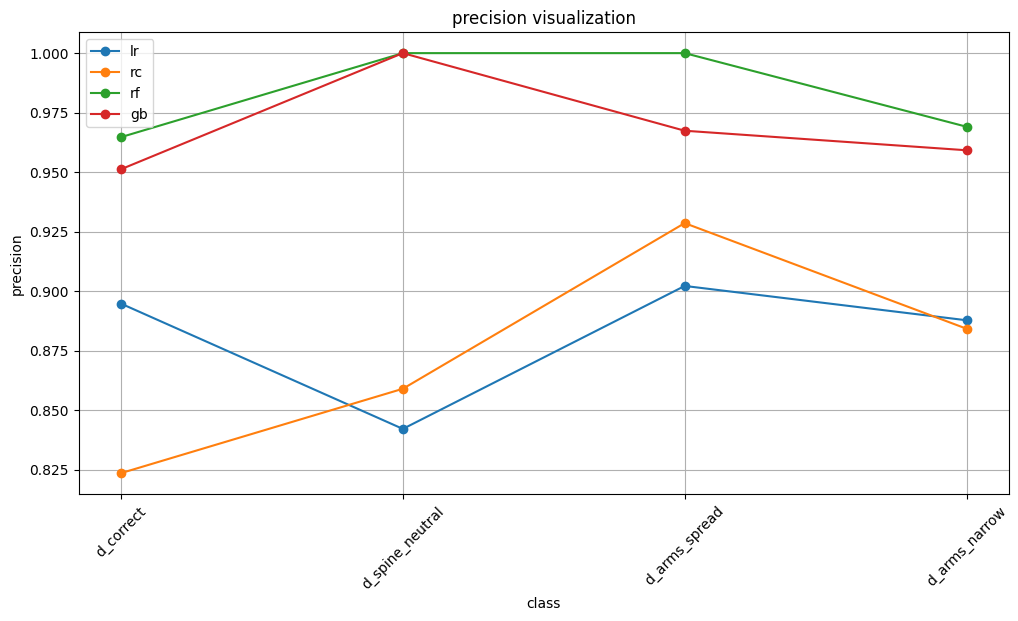

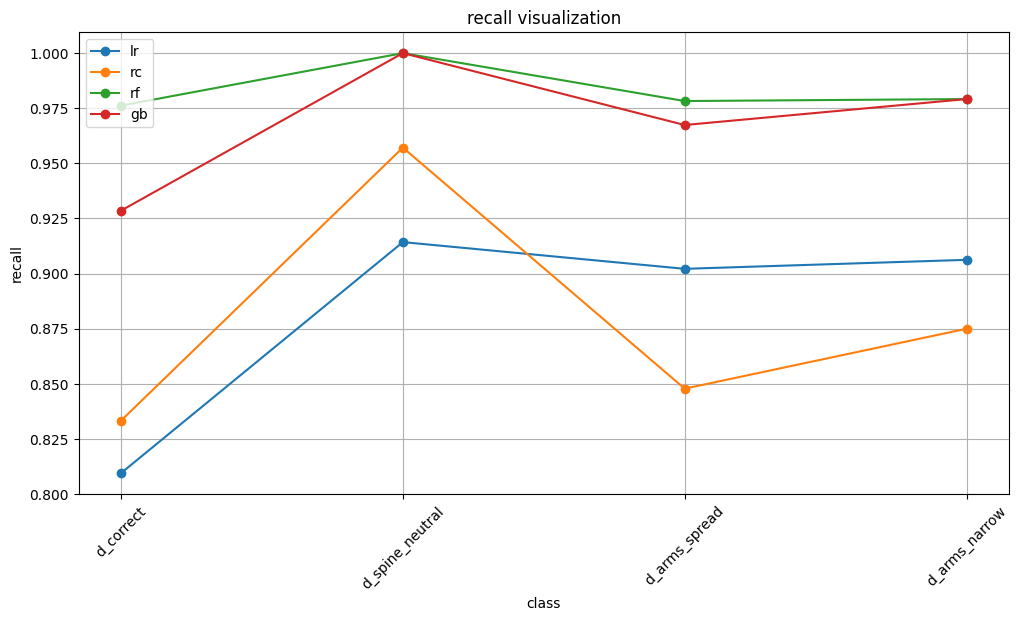

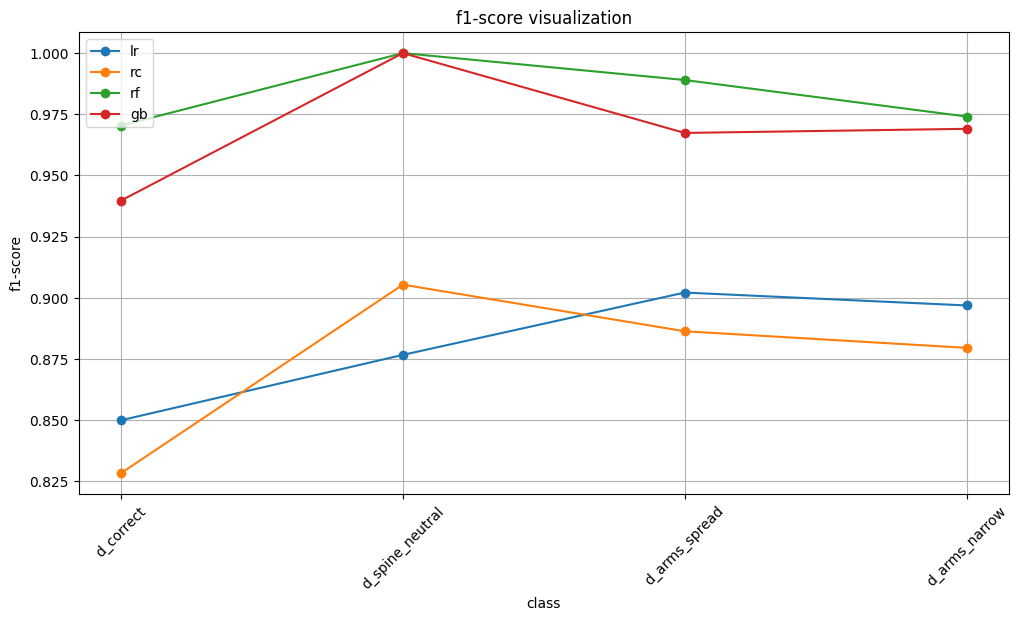

In [14]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 예측 결과를 저장할 딕셔너리 초기화
predictions = {}

# 각 모델에 대해 예측 수행
for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)  # 테스트 데이터에 대한 예측
    predictions[algorithm] = y_pred  # 예측 결과 저장

# 평가 지표 시각화
metrics = ['precision', 'recall', 'f1-score']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.title(f'{metric} visualization')

    for algorithm, y_pred in predictions.items():
        report = classification_report(y_test, y_pred, output_dict=True)
        metric_score = [report[label][metric] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]
        plt.plot(df['class'].unique(), metric_score, label=algorithm, marker='o', linestyle='-')

    plt.xlabel('class')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

## 4. Make Detections with Model

In [15]:
with open('deadlift_merged.pkl', 'wb') as f:
    pickle.dump(fit_models['gb'], f)